Ensure the two data set files are uploaded into your runtime

In [10]:
!pip install qiskit

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
!pip install qiskit_machine_learning

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 126 kB 38.4 MB/s 


In [12]:
import pandas as pd
import matplotlib
import numpy as np
import sklearn as sk
from sklearn.model_selection import train_test_split
import datetime
from datetime import date
import matplotlib.pyplot as plt

from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

from qiskit import BasicAer
from qiskit.circuit.library import ZZFeatureMap
from qiskit.utils import QuantumInstance, algorithm_globals
from qiskit_machine_learning.algorithms import QSVC
from qiskit_machine_learning.kernels import QuantumKernel

In [13]:
# Read in both data sets
data1 = pd.read_csv("diabetes.csv")
data2 = pd.read_csv("diabetes_data_upload.csv")

In [14]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, f1_score, classification_report, make_scorer
from sklearn import model_selection as ms
from sklearn.model_selection import cross_val_score
from sklearn.metrics import silhouette_score

In [15]:
df = pd.DataFrame(data1[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','Outcome']])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
m2 = {"Yes" : 1, "No": 0} # mapping from yes and no
df2 = pd.DataFrame(data2[['Age','Gender', 'class']])
d = data2.drop(labels=['Age','Gender', 'class'], axis=1)


for x in d.columns:
    df2[x] = d[x].map(m2)

m3 = {"Male" : 1, "Female": 0} # mapping for gender
df2['Gender'] = df2['Gender'].map(m3)
df.head()

m4 = {"Positive" : 1, "Negative": 0} # mapping for classification
df2['class'] = df2['class'].map(m4)
df2.head()

,Age,Gender,class,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity
0,40,1,1,0,1,0,1,0,0,0,1,0,1,0,1,1,1
1,58,1,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0
2,41,1,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0
3,45,1,1,0,0,1,1,1,1,0,1,0,1,0,0,0,0
4,60,1,1,1,1,1,1,1,0,1,1,1,1,1,1,1,1


In [17]:
data1_dimension=9
data2_dimension=16
features = df.drop(['Outcome'], axis=1)
label = df['Outcome']
features2 = df2.drop(['class'], axis=1)
features2 = df2.drop(['Age'], axis=1)
label2 = df2['class']
X_train, X_test , Y_train, Y_test = train_test_split(features, label, test_size = .25)
X_train2, X_test2 , Y_train2, Y_test2 = train_test_split(features2, label2, test_size = .25)
Z_train=X_train.to_numpy()

https://github.com/Qiskit/qiskit-machine-learning/blob/main/docs/tutorials/03_quantum_kernel.ipynb

Text(0.5, 1.0, 'Pregnancy vs Pedigree Function')

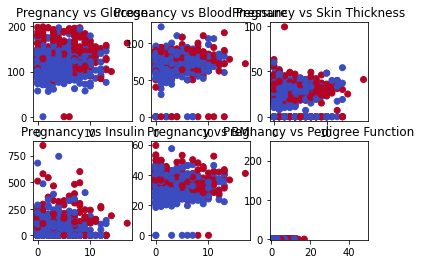

In [22]:
# Plot Scheming on my own
# Plot features vs features
figure, axis = plt.subplots(2,3)
plt.ylim(-1, 250)
plt.xlim(-1, 50)
axis[0,0].scatter(X_train.to_numpy()[:,0], X_train.to_numpy()[:,1], c=Y_train, cmap=plt.cm.coolwarm)
axis[0,0].set_title("Pregnancy vs Glucose")

axis[0,1].scatter(X_train.to_numpy()[:,0], X_train.to_numpy()[:,2], c=Y_train, cmap=plt.cm.coolwarm)
axis[0,1].set_title("Pregnancy vs Blood Pressure")

axis[0,2].scatter(X_train.to_numpy()[:,0], X_train.to_numpy()[:,3], c=Y_train, cmap=plt.cm.coolwarm)
axis[0,2].set_title("Pregnancy vs Skin Thickness")

axis[1,0].scatter(X_train.to_numpy()[:,0], X_train.to_numpy()[:,4], c=Y_train, cmap=plt.cm.coolwarm)
axis[1,0].set_title("Pregnancy vs Insulin")

axis[1,1].scatter(X_train.to_numpy()[:,0], X_train.to_numpy()[:,5], c=Y_train, cmap=plt.cm.coolwarm)
axis[1,1].set_title("Pregnancy vs BMI")

axis[1,2].scatter(X_train.to_numpy()[:,0], X_train.to_numpy()[:,6], c=Y_train, cmap=plt.cm.coolwarm)
axis[1,2].set_title("Pregnancy vs Pedigree Function")

## Classification

In [23]:
seed = 12345
algorithm_globals.random_seed = seed
feature_map1 = ZZFeatureMap(feature_dimension=data1_dimension, reps=2, entanglement="linear")
feature_map2 = ZZFeatureMap(feature_dimension=data2_dimension, reps=2, entanglement="linear")

backend = QuantumInstance(
    BasicAer.get_backend("qasm_simulator"), shots=1024, seed_simulator=seed, seed_transpiler=seed
)

kernel1 = QuantumKernel(feature_map=feature_map1, quantum_instance=backend)
kernel2 = QuantumKernel(feature_map=feature_map2, quantum_instance=backend)

Data 1

In [24]:
params = {
    "C": range(10,12,1),
    "gamma": np.arange(.05,.15,.01),
}
cv = 7
svc = SVC()
svm_model = GridSearchCV(svc, params, scoring='accuracy', cv = cv)
#train our model
svm_model.fit(X_train,Y_train)
svm_hat = svm_model.predict(X_test)
#extract the best estimator
best_svc = svm_model.best_estimator_
svm_model.best_score_
print(svm_model.best_params_)

{'C': 10, 'gamma': 0.05}


In [25]:
best_params = {
    'C': [10],
    "gamma" : [.05]
}

new_svm_model = GridSearchCV(estimator = best_svc, param_grid = best_params, scoring='accuracy', cv=cv)
new_svm_model.fit(X_train,Y_train)
new_hat = new_svm_model.predict(X_test)
# evaluate the model 
testScore = new_svm_model.score(X_test,Y_test)
print("Model Score:", testScore)

#classification report
print(metrics.classification_report(Y_test, new_hat))

scores = cross_val_score(new_svm_model, features, label, cv=cv)
print("Average Validation Score: ", scores.mean())

Model Score: 0.6614583333333334
              precision    recall  f1-score   support

           0       0.66      0.99      0.79       125
           1       0.75      0.04      0.08        67

    accuracy                           0.66       192
   macro avg       0.70      0.52      0.44       192
weighted avg       0.69      0.66      0.55       192

Average Validation Score:  0.6549505540331229


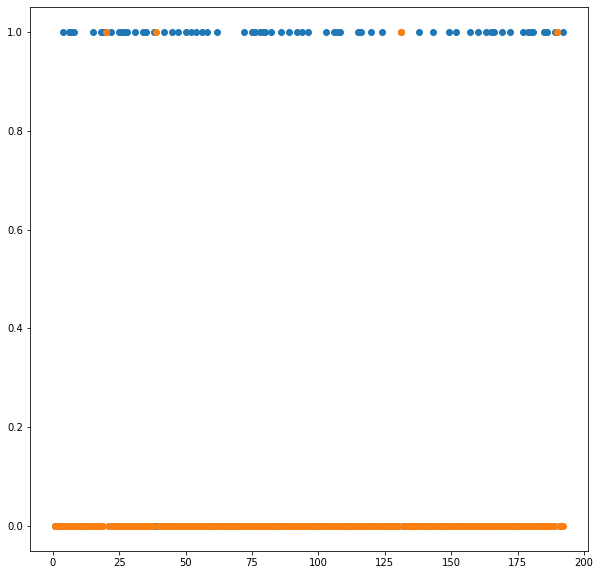

In [26]:
plt.figure(figsize=[10,10])
#plt.imshow(np.asmatrix(new_hat).T)
plt.scatter(np.arange(1,193,1), Y_test)
plt.scatter(np.arange(1,193,1), new_hat)

Data 2

In [27]:
params = {
    "C": range(1,10,1),
    "gamma": np.arange(0,.5,.1),
}
cv = 7
svc = SVC()
svm_model = GridSearchCV(svc, params, scoring='accuracy', cv = cv)
#train our model
svm_model.fit(X_train2,Y_train2)
svm_hat = svm_model.predict(X_test2)
#extract the best estimator
best_svc = svm_model.best_estimator_
svm_model.best_score_
print(svm_model.best_params_)

{'C': 1, 'gamma': 0.1}


In [28]:
best_params = {
    'C': [1],
    "gamma" : [.2]
}

new_svm_model = GridSearchCV(estimator = best_svc, param_grid = best_params, scoring='accuracy', cv=cv)
new_svm_model.fit(X_train2,Y_train2)
new_hat = new_svm_model.predict(X_test2)
# evaluate the model 
testScore = new_svm_model.score(X_test2,Y_test2)
print("Model Score:", testScore)

#classification report
print(metrics.classification_report(Y_test2, new_hat))

scores = cross_val_score(new_svm_model, features, label, cv=cv)
print("Average Validation Score: ", scores.mean())

Model Score: 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        62
           1       1.00      1.00      1.00        68

    accuracy                           1.00       130
   macro avg       1.00      1.00      1.00       130
weighted avg       1.00      1.00      1.00       130

Average Validation Score:  0.6510425354462052


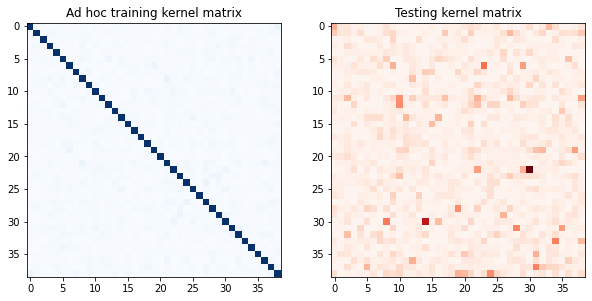

ValueError: ignored

In [33]:
newX_train = X_train.to_numpy()[1:40,:]
newX_test = X_test.to_numpy()[1:40,:]
newY_train = Y_train.to_numpy()[1:40]
newY_test = Y_test.to_numpy()[1:40]

matrix_train2 = kernel2.evaluate(x_vec=newX_train)
matrix_test2 = kernel2.evaluate(x_vec=newX_test, y_vec=newX_train)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(
    np.asmatrix(matrix_train2), interpolation="nearest", origin="upper", cmap="Blues"
)
axs[0].set_title("Ad hoc training kernel matrix")
axs[1].imshow(np.asmatrix(matrix_test2), interpolation="nearest", origin="upper", cmap="Reds")
axs[1].set_title("Testing kernel matrix")
plt.show()

svc = SVC(kernel="precomputed")
svc.fit(matrix_train2, newY_train)
#score = svc.score(matrix_test2, newX_test)

#print(f"Precomputed kernel classification test score: {score}")

In [ ]:
# Yet to be able to run 
'''
qsvc2 = QSVC(quantum_kernel=kernel2)
qsvc2.fit(X_train2, Y_train2)
qsvc_score2 = qsvc.score(X_test2, Y_test2)

print(f"QSVC classification test score: {qsvc_score2}")
'''